### Ćwiczenia projektowe 2.
Anna Marjankowska, Adrian Żyła

In [138]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from IPython.display import Image
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

Przejdźmy do wgrania zestawu danych:

In [139]:
data = pd.read_csv('/Users/aniamarjankowska/Documents/GitHub/machine_learning/decision_tree/stroke_zaj2.csv', sep = ';', decimal = ',')
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [122]:
data.shape

(400, 11)

In [123]:
data['stroke'].value_counts()

1    200
0    200
Name: stroke, dtype: int64

In [124]:
data.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [125]:
data.isnull().sum()

gender                0
age                   0
hypertension          0
heart_disease         0
ever_married          0
work_type             0
Residence_type        0
avg_glucose_level     0
bmi                  37
smoking_status        0
stroke                0
dtype: int64

#### Zadanie 1.  
Scharakteryzować krótko wykorzystywane dane (czego dotyczą, jakiego rodzaju zmienne zawierają, jaki jest poziom zbalansowania zbioru danych). Wyeliminować braki danych.


W zbiorze danych posiadamy zmienne dotyczące **stanu zdrowia**, **stylu życia** oraz **wieku**. Zmienne kategoryczne to **gender**, **ever_married**, **work_type**, **residence_type**, **smoking_status**. W zmiennej kategorycznej bmi jest 37 brakujących wartości.<br>
Rowiążemy ten problem, poprzez usunięcie tych wierszy ze bioru danych. 

In [126]:
data = data.dropna()

In [127]:
data.shape

(363, 11)

In [128]:
data['stroke'].value_counts()

0    193
1    170
Name: stroke, dtype: int64

In [129]:
gender_dummies = pd.get_dummies(data['gender'], dtype = int, drop_first = True) # Ustawiamy zmienna drop_first na True, aby pominac jedna kolumnę, w celu uniknięcia wspólniowości zmiennych
ever_married_dummies = pd.get_dummies(data['ever_married'], dtype = int, drop_first = True)
work_type_dummies = pd.get_dummies(data['work_type'], dtype = int, drop_first = True)
residence_type_dummies = pd.get_dummies(data['Residence_type'], dtype = int, drop_first = True)
smoking_status_dummies = pd.get_dummies(data['smoking_status'], dtype = int, drop_first = True)

In [130]:
data = pd.concat([gender_dummies, data[['age', 'hypertension', 'heart_disease']], ever_married_dummies, work_type_dummies, 
        residence_type_dummies, data[['avg_glucose_level', 'bmi',]], smoking_status_dummies, data[['stroke']]], axis = 1)
data = data.rename(columns = {'Yes': 'ever_married'})
data.head()

,Male,age,hypertension,heart_disease,ever_married,Never_worked,Private,Self-employed,children,Urban,avg_glucose_level,bmi,formerly smoked,never smoked,smokes,stroke
0,1,67.0,0,1,1,0,1,0,0,1,228.69,36.6,1,0,0,1
1,1,80.0,0,1,1,0,1,0,0,0,105.92,32.5,0,1,0,1
2,0,49.0,0,0,1,0,1,0,0,1,171.23,34.4,0,0,1,1
3,0,79.0,1,0,1,0,0,1,0,0,174.12,24.0,0,1,0,1
4,1,81.0,0,0,1,0,1,0,0,1,186.21,29.0,1,0,0,1


Przejdzmy do budowy drzewa 

In [99]:
y = data.stroke
X = data.iloc[:, 0:14]

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

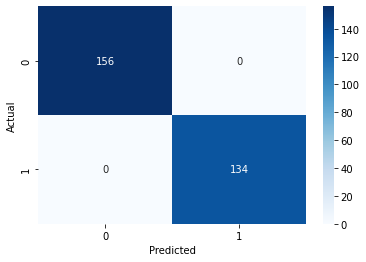

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       156
           1       1.00      1.00      1.00       134

    accuracy                           1.00       290
   macro avg       1.00      1.00      1.00       290
weighted avg       1.00      1.00      1.00       290



In [101]:
# Prezentacja wyników na zbiorze uczącym
conf_matrix = confusion_matrix(y_train, y_pred_train)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print(classification_report(y_train, y_pred_train))

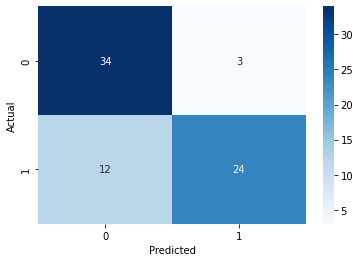

              precision    recall  f1-score   support

           0       0.74      0.92      0.82        37
           1       0.89      0.67      0.76        36

    accuracy                           0.79        73
   macro avg       0.81      0.79      0.79        73
weighted avg       0.81      0.79      0.79        73



In [102]:
conf_matrix = confusion_matrix(y_test, y_pred_test)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print(classification_report(y_test, y_pred_test))

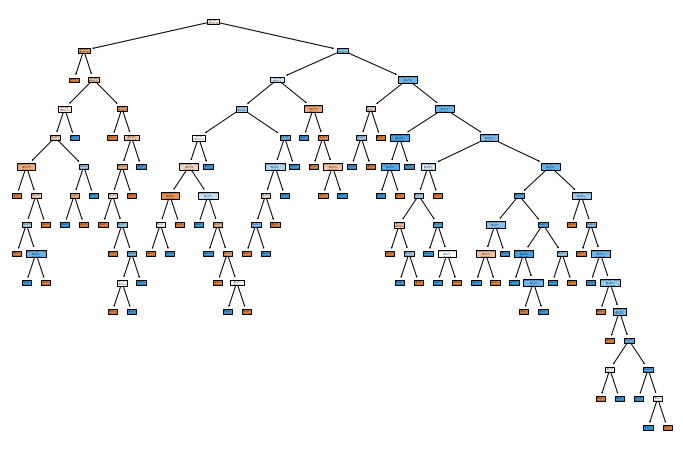

In [103]:
plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=X_train.columns, filled=True)
plt.show()

In [104]:
model2 = DecisionTreeClassifier(max_depth=2, criterion='gini' )
model2.fit(X_train, y_train)

y_pred_train = model2.predict(X_train)
y_pred_test = model2.predict(X_test)

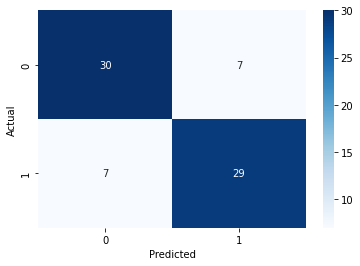

              precision    recall  f1-score   support

           0       0.81      0.81      0.81        37
           1       0.81      0.81      0.81        36

    accuracy                           0.81        73
   macro avg       0.81      0.81      0.81        73
weighted avg       0.81      0.81      0.81        73



In [105]:
conf_matrix = confusion_matrix(y_test, y_pred_test)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print(classification_report(y_test, y_pred_test))

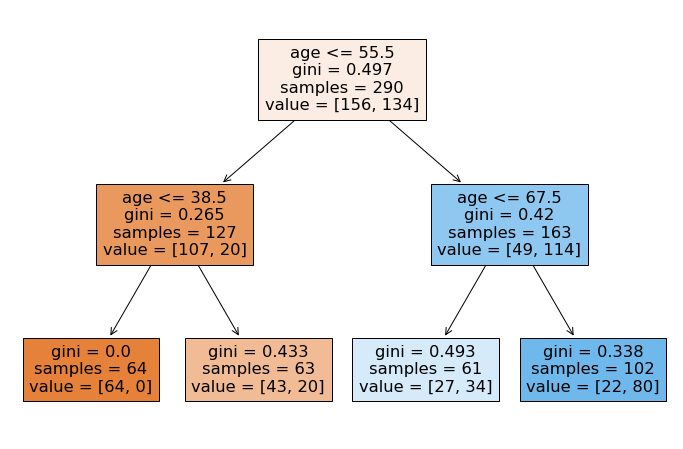

In [106]:
plt.figure(figsize=(12, 8))
plot_tree(model2, feature_names=X_train.columns, filled=True)
plt.show()

Las losowy

In [107]:
model3 = RandomForestClassifier()
model3.fit(X_train, y_train)

y_pred_train = model3.predict(X_train)
y_pred_test = model3.predict(X_test)

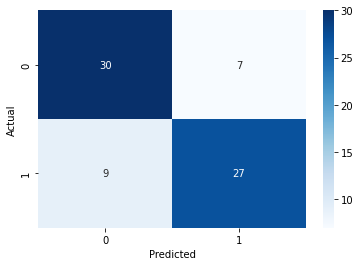

              precision    recall  f1-score   support

           0       0.77      0.81      0.79        37
           1       0.79      0.75      0.77        36

    accuracy                           0.78        73
   macro avg       0.78      0.78      0.78        73
weighted avg       0.78      0.78      0.78        73



In [108]:
conf_matrix = confusion_matrix(y_test, y_pred_test)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print(classification_report(y_test, y_pred_test))

In [109]:
model4 = RandomForestClassifier(max_depth=3, n_estimators = 25, criterion='gini')
model4.fit(X_train, y_train)

y_pred_train = model4.predict(X_train)
y_pred_test = model4.predict(X_test)

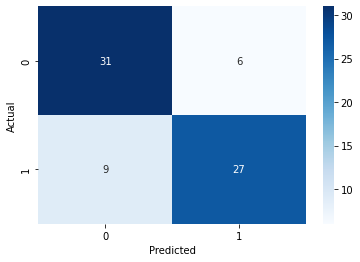

              precision    recall  f1-score   support

           0       0.78      0.84      0.81        37
           1       0.82      0.75      0.78        36

    accuracy                           0.79        73
   macro avg       0.80      0.79      0.79        73
weighted avg       0.80      0.79      0.79        73



In [110]:
conf_matrix = confusion_matrix(y_test, y_pred_test)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print(classification_report(y_test, y_pred_test))

In [111]:
best_n_estimators = 0
best_max_depth = 0
best_accuracy = 0
for i in tqdm(range(1, 50)):
    for j in range(1, 20):
        model_rf = RandomForestClassifier(n_estimators=i, max_depth=j)
        model_rf.fit(X_train, y_train)
        y_pred_test = model_rf.predict(X_test)
        accuracy_test = accuracy_score(y_test, y_pred_test)
        if accuracy_test > best_accuracy:
            best_accuracy = accuracy_test
            best_n_estimators = i
            best_max_depth = j

100%|██████████| 49/49 [00:38<00:00,  1.26it/s]


In [113]:
print(f'Best n_estimators: {best_n_estimators}')
print(f'Best max_depth: {best_max_depth}')
print(f'Best accuracy: {best_accuracy}')

Best n_estimators: 11
Best max_depth: 17
Best accuracy: 0.8356164383561644


# AdaBoost

In [133]:
model5 = AdaBoostClassifier()
model5.fit(X_train, y_train)

AdaBoostClassifier()

In [134]:
y_train_pred = model5.predict(X_train)
y_test_pred = model5.predict(X_test)

In [135]:
print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.82      0.79      0.81       156
           1       0.77      0.80      0.78       134

    accuracy                           0.80       290
   macro avg       0.80      0.80      0.80       290
weighted avg       0.80      0.80      0.80       290

              precision    recall  f1-score   support

           0       0.77      0.81      0.79        37
           1       0.79      0.75      0.77        36

    accuracy                           0.78        73
   macro avg       0.78      0.78      0.78        73
weighted avg       0.78      0.78      0.78        73



# Bagging

In [136]:
model6 = BaggingClassifier()
model6.fit(X_train, y_train)
y_train_pred = model6.predict(X_train)
y_test_pred = model6.predict(X_test)

In [137]:
print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.82      0.79      0.81       156
           1       0.77      0.80      0.78       134

    accuracy                           0.80       290
   macro avg       0.80      0.80      0.80       290
weighted avg       0.80      0.80      0.80       290

              precision    recall  f1-score   support

           0       0.77      0.81      0.79        37
           1       0.79      0.75      0.77        36

    accuracy                           0.78        73
   macro avg       0.78      0.78      0.78        73
weighted avg       0.78      0.78      0.78        73



# SVM 

Do algorytmu SVM należy zestandaryzować dane. 

In [34]:
data = pd.read_csv('/Users/aniamarjankowska/Documents/GitHub/machine_learning/decision_tree/stroke_zaj2.csv', sep = ';', decimal = ',')

In [35]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [36]:
data = data.dropna()

In [37]:
gender_dummies = pd.get_dummies(data['gender'], dtype = int, drop_first = True) # Ustawiamy zmienna drop_first na True, aby pominac jedna kolumnę, w celu uniknięcia wspólniowości zmiennych
ever_married_dummies = pd.get_dummies(data['ever_married'], dtype = int, drop_first = True)
work_type_dummies = pd.get_dummies(data['work_type'], dtype = int, drop_first = True)
residence_type_dummies = pd.get_dummies(data['Residence_type'], dtype = int, drop_first = True)
smoking_status_dummies = pd.get_dummies(data['smoking_status'], dtype = int, drop_first = True)

In [38]:
data = pd.concat([gender_dummies, data[['age', 'hypertension', 'heart_disease']], ever_married_dummies, work_type_dummies, 
        residence_type_dummies, data[['avg_glucose_level', 'bmi',]], smoking_status_dummies, data[['stroke']]], axis = 1)
data = data.rename(columns = {'Yes': 'ever_married'})
data.head()

,Male,age,hypertension,heart_disease,ever_married,Never_worked,Private,Self-employed,children,Urban,avg_glucose_level,bmi,formerly smoked,never smoked,smokes,stroke
0,1,67.0,0,1,1,0,1,0,0,1,228.69,36.6,1,0,0,1
1,1,80.0,0,1,1,0,1,0,0,0,105.92,32.5,0,1,0,1
2,0,49.0,0,0,1,0,1,0,0,1,171.23,34.4,0,0,1,1
3,0,79.0,1,0,1,0,0,1,0,0,174.12,24.0,0,1,0,1
4,1,81.0,0,0,1,0,1,0,0,1,186.21,29.0,1,0,0,1


In [39]:
X = data.iloc[:, 0:14]
y = data.stroke
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [56]:
scaler = StandardScaler()
X_train[['age', 'avg_glucose_level', 'bmi']] = scaler.fit_transform(X_train[['age', 'avg_glucose_level', 'bmi']])
X_test[['age', 'avg_glucose_level', 'bmi']] = scaler.transform(X_test[['age', 'avg_glucose_level', 'bmi']])

In [63]:
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)

SVC(kernel='linear')

In [64]:
y_train_pred = svm_linear.predict(X_train)
y_test_pred = svm_linear.predict(X_test)

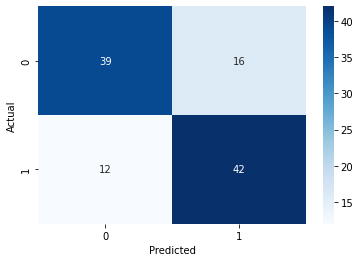

              precision    recall  f1-score   support

           0       0.76      0.71      0.74        55
           1       0.72      0.78      0.75        54

    accuracy                           0.74       109
   macro avg       0.74      0.74      0.74       109
weighted avg       0.74      0.74      0.74       109



In [65]:
conf_matrix = confusion_matrix(y_test, y_test_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print(classification_report(y_test,y_test_pred))

In [66]:
svm_poly = SVC(kernel='poly')
svm_poly.fit(X_train, y_train)

SVC(kernel='poly')

In [69]:
y_train_pred = svm_poly.predict(X_train)
y_test_pred = svm_poly.predict(X_test)

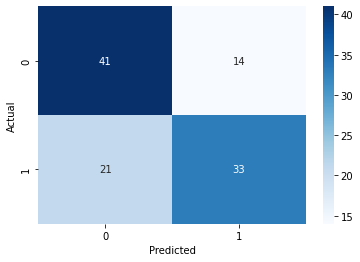

              precision    recall  f1-score   support

           0       0.66      0.75      0.70        55
           1       0.70      0.61      0.65        54

    accuracy                           0.68       109
   macro avg       0.68      0.68      0.68       109
weighted avg       0.68      0.68      0.68       109



In [70]:
conf_matrix = confusion_matrix(y_test, y_test_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print(classification_report(y_test,y_test_pred))

In [72]:
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)

SVC()

In [73]:
y_train_pred = svm_rbf.predict(X_train)
y_test_pred = svm_rbf.predict(X_test)

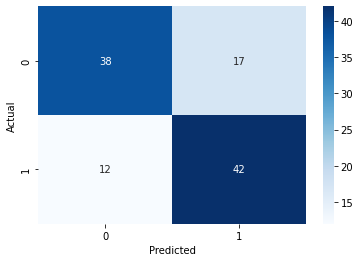

              precision    recall  f1-score   support

           0       0.76      0.69      0.72        55
           1       0.71      0.78      0.74        54

    accuracy                           0.73       109
   macro avg       0.74      0.73      0.73       109
weighted avg       0.74      0.73      0.73       109



In [74]:
conf_matrix = confusion_matrix(y_test, y_test_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print(classification_report(y_test,y_test_pred))

In [75]:
#compare results for diffeenrt kernels in SVM model in loop, results print in table
kernels = ['linear', 'poly', 'rbf']
results = []
for kernel in kernels:
    model_SVM = SVC(kernel=kernel)
    model_SVM.fit(X_train, y_train)
    y_pred_test = model_SVM.predict(X_test)
    accuracy_test = accuracy_score(y_test, y_pred_test)
    results.append(accuracy_test)
results = pd.DataFrame(results, index=kernels, columns=['accuracy'])
results

,accuracy
linear,0.743119
poly,0.678899
rbf,0.733945


In [78]:
#create simmilar loop but also add results for train data
kernels = ['linear', 'poly', 'rbf']
results = []
for kernel in kernels:
    model_SVM = SVC(kernel=kernel)
    model_SVM.fit(X_train, y_train)
    y_pred_train = model_SVM.predict(X_train)
    y_pred_test = model_SVM.predict(X_test)
    accuracy_train = accuracy_score(y_train, y_pred_train)
    accuracy_test = accuracy_score(y_test, y_pred_test)
    results.append([accuracy_train, accuracy_test])
results = pd.DataFrame(results, index=kernels, columns=['accuracy_train', 'accuracy_test'])
results

,accuracy_train,accuracy_test
linear,0.807087,0.743119
poly,0.846457,0.678899
rbf,0.826772,0.733945


In [83]:
#create simmilar loop but also add results for train data
kernels = ['linear', 'poly', 'rbf']
results = []
for kernel in kernels:
    model_SVM = SVC(kernel=kernel, C=13)
    model_SVM.fit(X_train, y_train)
    y_pred_train = model_SVM.predict(X_train)
    y_pred_test = model_SVM.predict(X_test)
    accuracy_train = accuracy_score(y_train, y_pred_train)
    accuracy_test = accuracy_score(y_test, y_pred_test)
    results.append([accuracy_train, accuracy_test])
results = pd.DataFrame(results, index=kernels, columns=['accuracy_train', 'accuracy_test'])
results

,accuracy_train,accuracy_test
linear,0.807087,0.724771
poly,0.933071,0.669725
rbf,0.937008,0.678899


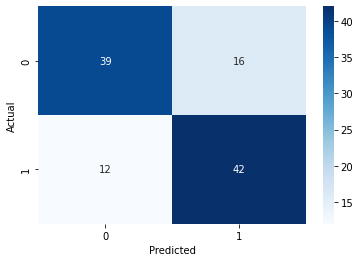

              precision    recall  f1-score   support

           0       0.76      0.71      0.74        55
           1       0.72      0.78      0.75        54

    accuracy                           0.74       109
   macro avg       0.74      0.74      0.74       109
weighted avg       0.74      0.74      0.74       109



In [84]:
model_SVM = SVC(C=1, degree=2, gamma='scale', kernel='linear')
model_SVM.fit(X_train, y_train)
y_train_pred = model_SVM.predict(X_train)
y_test_pred = model_SVM.predict(X_test)


conf_matrix = confusion_matrix(y_test, y_test_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print(classification_report(y_test,y_test_pred))